In [1]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 9)
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# load the provided data
train_features = pd.read_csv('./data/dengue_features_train.csv', index_col=[0,1,2])
train_labels = pd.read_csv('./data/dengue_labels_train.csv', index_col=[0,1,2])

# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [3]:
# Fill NaNs
sj_train_features.interpolate(method='linear', inplace=True)
iq_train_features.interpolate(method='linear', inplace=True)

In [4]:
# Join total_cases
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

In [5]:
# Smooth series
iq_train_features_smooth = pd.rolling_mean(iq_train_features, window=3)
sj_train_features_smooth = pd.rolling_mean(sj_train_features, window=3)

In [6]:
# Derivatives 
attrs = [
    'ndvi_se', 
    'ndvi_sw', 
    'ndvi_nw', 
    'ndvi_ne', 
    'station_max_temp_c', 
    'station_min_temp_c', 
    'station_avg_temp_c', 
    'station_precip_mm', 
    'station_diur_temp_rng_c',
    'precipitation_amt_mm', 
    'reanalysis_sat_precip_amt_mm',
    'reanalysis_dew_point_temp_k',
    'reanalysis_air_temp_k',
    'reanalysis_relative_humidity_percent',
    'reanalysis_specific_humidity_g_per_kg',
    'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_max_air_temp_k',
    'reanalysis_min_air_temp_k',
    'reanalysis_avg_temp_k',
    'reanalysis_tdtr_k',
    'total_cases'
]
for attr in attrs:
    iq_train_features[attr + '_diff'] = iq_train_features_smooth[attr].diff()
    sj_train_features[attr + '_diff'] = sj_train_features_smooth[attr].diff()
    
for attr in attrs:
    iq_train_features[attr + '_diff2'] = iq_train_features[attr + '_diff'].diff()
    sj_train_features[attr + '_diff2'] = sj_train_features[attr + '_diff'].diff()
    

In [7]:
# Compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

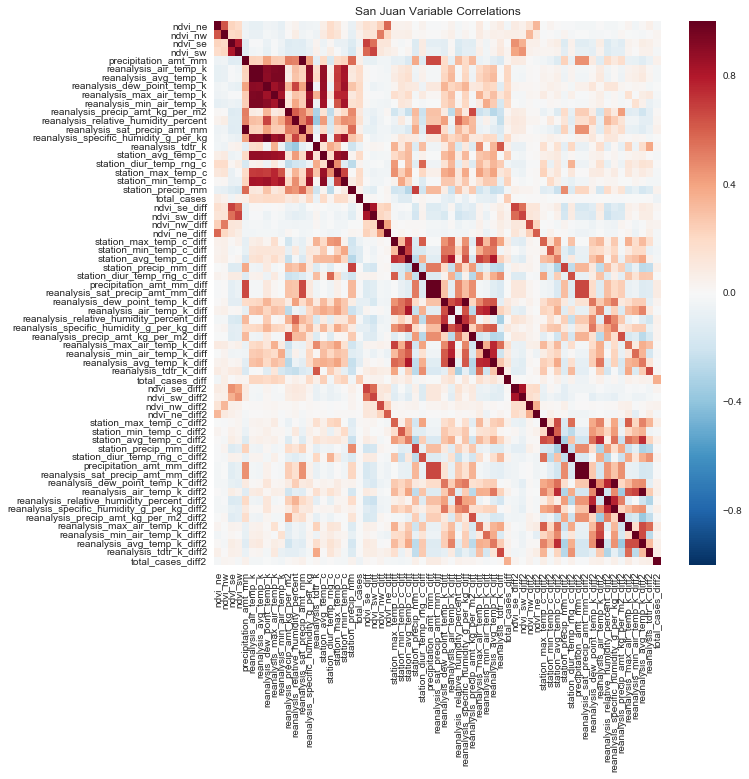

In [8]:
# plot san juan
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sj_corr_heat = sns.heatmap(sj_correlations, ax=ax)
plt.title('San Juan Variable Correlations')

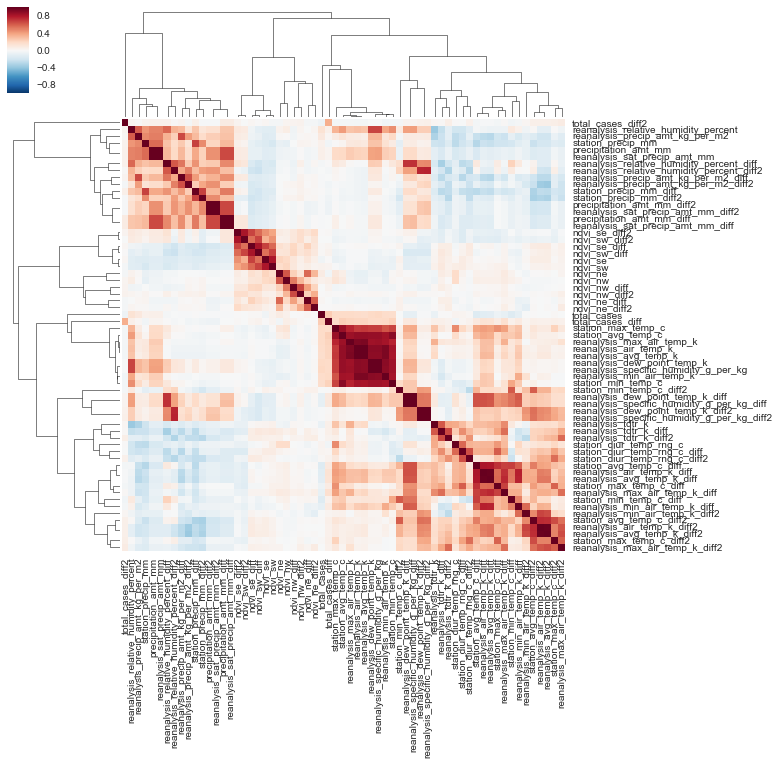

In [9]:
# san juan clustermap
sj_corr_clustermap = sns.clustermap(sj_correlations, metric='correlation')
plt.setp(sj_corr_clustermap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

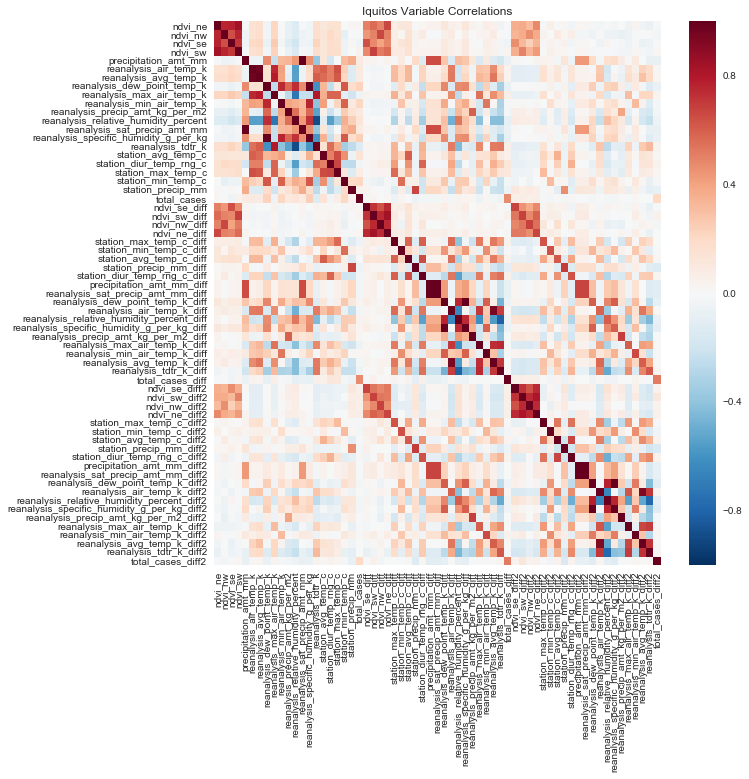

In [10]:
# plot iquitos
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
iq_corr_heat = sns.heatmap(iq_correlations, ax=ax)
plt.title('Iquitos Variable Correlations')

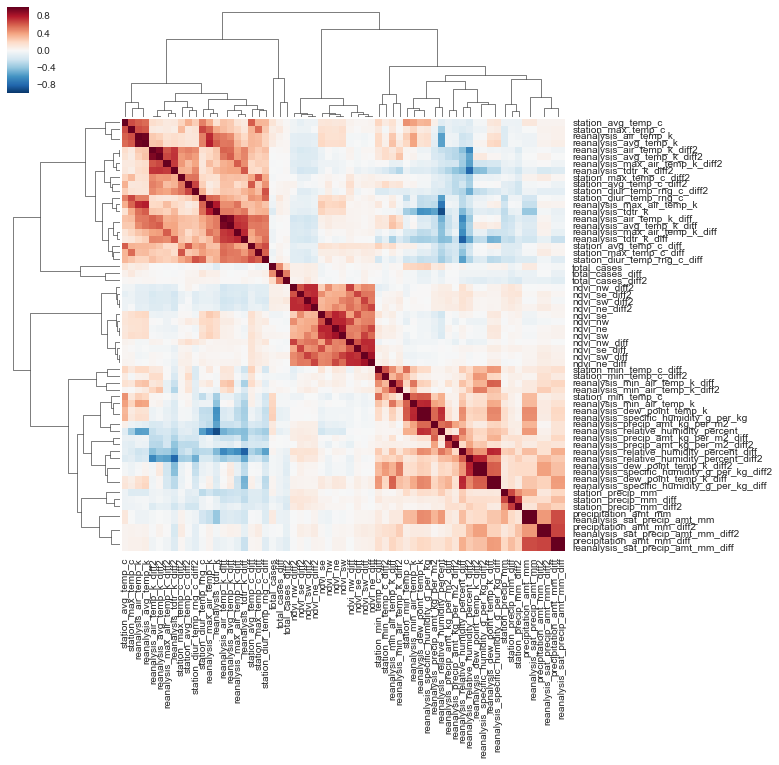

In [11]:
# iquitos clustermap
iq_corr_clustermap = sns.clustermap(iq_correlations, metric='correlation')
plt.setp(iq_corr_clustermap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

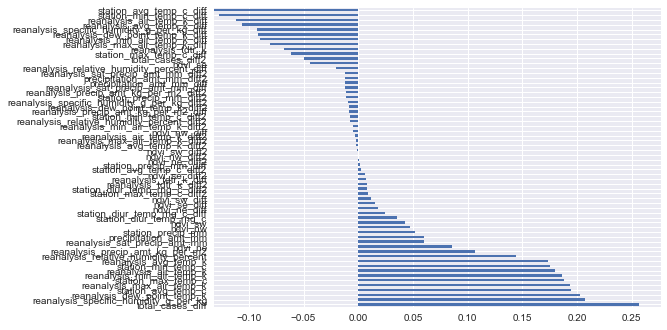

In [12]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

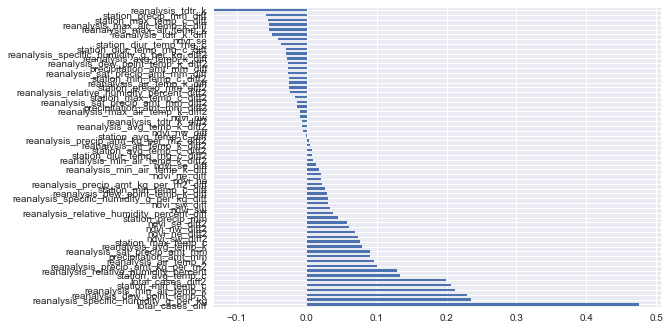

In [13]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())
